In [79]:
import pandas as pd 
import numpy as np

In [43]:
df= pd.read_csv('ad.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [44]:
df.shape

(200, 5)

The dataset consists of 200 rows and 5 columns 

<AxesSubplot:>

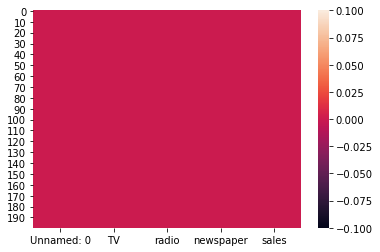

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())

In [46]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [47]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


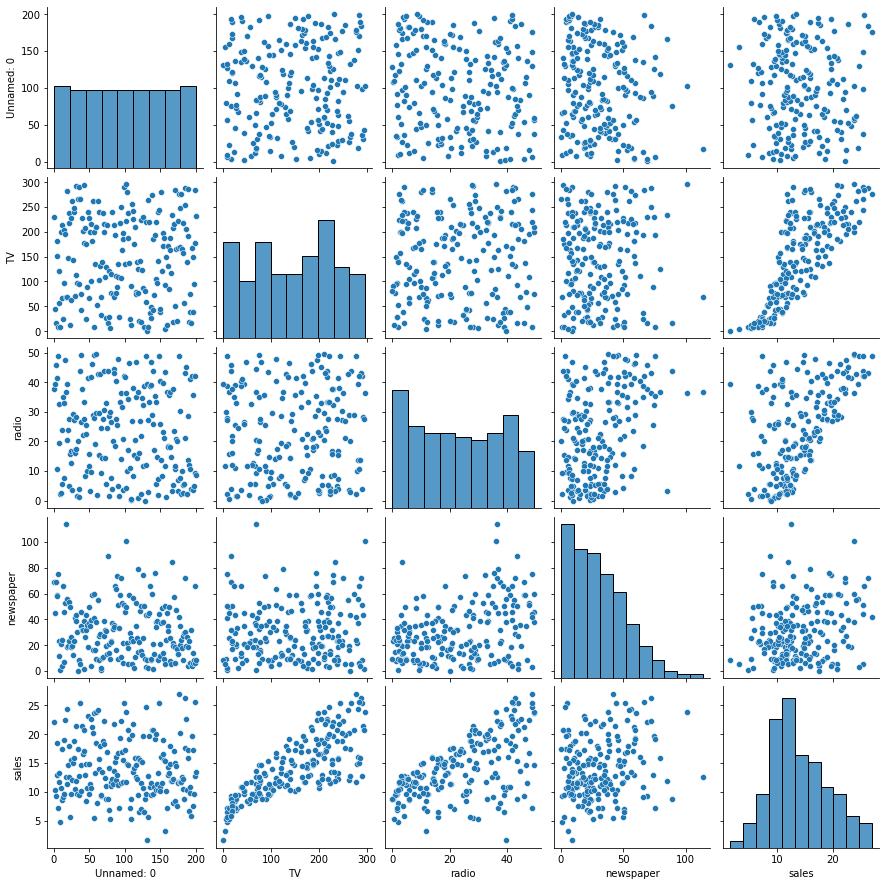

In [48]:
sns.pairplot(df)

<AxesSubplot:xlabel='TV', ylabel='sales'>

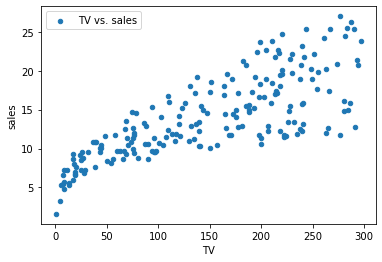

In [49]:
df.plot(kind='scatter',x='TV' ,y ='sales' , label ='TV vs. sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

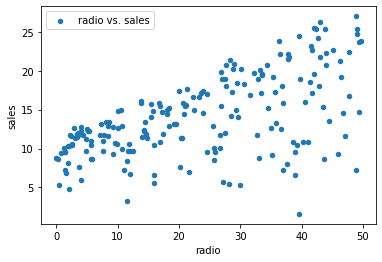

In [50]:
df.plot(kind='scatter',x='radio' ,y ='sales' , label ='radio vs. sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

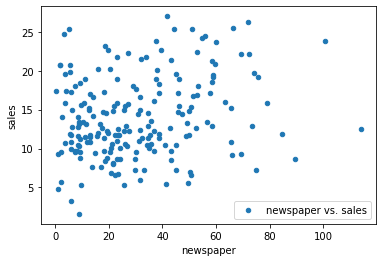

In [51]:
df.plot(kind='scatter',x='newspaper' ,y ='sales' , label ='newspaper vs. sales')

All the abov scatter plots show that there is a good linear relation with target column "sales".

In [55]:
cor=df.corr()
cor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


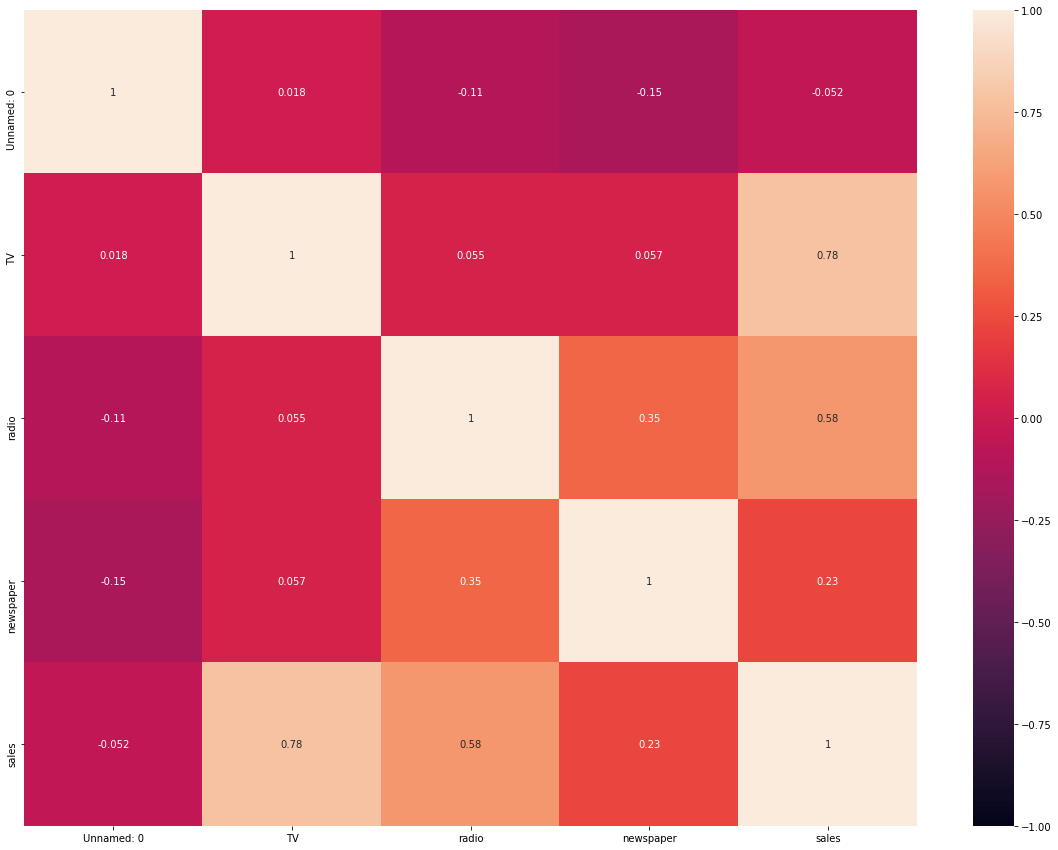

In [56]:
plt.figure(figsize=[20,15])
sns.heatmap(cor, annot=True,vmin=-1 , vmax=1)
plt.show()

sales shows highest correlation with tv- 78%
sales shows second highest correlation with radio- 58%
sales shows  correlation with newspapr - 78%


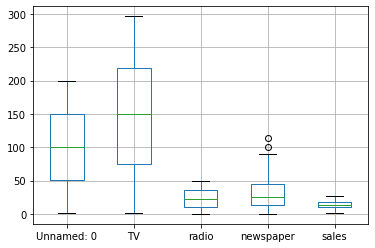

In [60]:
df.boxplot()
plt.show()

DATA SEEMS TO BE FREE OF OUTLIERS. 


In [71]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

There is a presence of slight skewness in the columns.

On reading and understanding the data set it can seen that the trget column is having continuous data and the data ha sa linear relationship with its independent variable countrpart hence one can assume that the dataset rquires an approach of linear regression to solve the datset.

#### Scaling the data /Splitting  the data.

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

MM=MinMaxScaler()
lr=LinearRegression()

In [83]:
import warnings
warnings.filterwarnings('ignore')
y=df['sales']
x=df.drop(['sales'], axis =1)


In [84]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [85]:
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=22)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(140, 4)
(60, 4)
(60,)
(140,)


### Scaling the data

In [88]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM_fit=MM.fit(x_train)
MM_train=MM_fit.transform(x_train)
MM_test=MM_fit.transform(x_test)
print(MM_train)
print(MM_test)

[[0.99494949 0.59621238 0.1875     0.05364996]
 [0.01010101 0.0557998  0.92540323 0.60686016]
 [0.27272727 0.88603314 0.58064516 0.13720317]
 [0.5959596  0.42272574 0.74395161 0.6939314 ]
 [0.91414141 0.73655732 0.10887097 0.23834653]
 [0.48989899 0.62292864 0.4233871  0.19085312]
 [0.37373737 0.71931011 0.49596774 0.11257696]
 [0.00505051 0.1481231  0.79233871 0.39401935]
 [0.1969697  0.76868448 0.76008065 0.27880387]
 [0.11111111 0.04227257 0.32056452 0.43359719]
 [0.93434343 0.69090294 0.90927419 0.16974494]
 [0.8030303  0.44301657 0.37096774 0.30167106]
 [0.33838384 0.4687183  0.29233871 0.08707124]
 [0.04545455 0.67331755 0.05241935 0.18381706]
 [0.86363636 0.5539398  0.42137097 0.41424802]
 [0.47979798 0.54988164 0.63709677 0.46262093]
 [0.6969697  0.14305039 0.52217742 0.17766051]
 [0.17676768 0.98072371 0.08266129 0.07211961]
 [0.95959596 0.13121407 0.82862903 0.04837291]
 [0.2979798  0.71017924 0.59475806 0.07915567]
 [0.05555556 0.72370646 0.48387097 0.03254178]
 [0.56565657 

### Linear Regression - scoring the model/checking.

In [90]:
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_pred=lr.predict(x_test)
print(lr_pred)

0.8917761532369537
[10.16184794  9.88126218  7.51672872 24.09550256 17.45183236  9.05175307
  4.52323236  7.49556655 19.50003825 12.31423867  6.22486482 19.92607329
 20.22470362 18.02646528 15.84605796  8.84683758 22.33394539 23.31490615
 14.34294708 10.87625381 16.62527239 19.18432466 19.26949461 14.18947599
 12.38223496 14.97223129  9.79266911 11.1805885  17.32010926 21.43928909
 13.83803476 17.73047571  9.15327502 10.44290738  8.47256578  8.70226907
 17.14324299 18.37718865 11.88648405 10.7774102  22.89620133 10.01203729
 11.33735548 18.1465677  12.5822953  15.43897806 13.86873365  6.97554918
 15.22613659 13.72760579 10.27367331 12.2986413  10.60859239 10.4514195
 11.84636253 10.98001621  7.82078016  6.96818183 19.24052831  8.14103895]


In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_pred, y_test)

2.554403418716023

In [92]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8917761532348776

In [93]:
ls.coef_

array([0.00064882, 0.04422028, 0.19635502, 0.00057732])

In [94]:
rd=Ridge(0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8917761532369533

In [95]:
rd.coef_

array([0.00064887, 0.04422029, 0.19635541, 0.00057743])

### Peforming other analysis.

In [96]:
from sklearn.svm import SVR
KL=['linear','poly','rbf']
for i in KL:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8781380747810247
0.8577085205064614
0.7439607792015706


In [98]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth=5)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print(dtc_pred)

[12.6        10.4         9.79166667 25.38       17.8         1.6
  6.75        8.13333333 18.84        9.1         6.75       20.375
 18.84       18.84       12.6         9.79166667 22.71538462 25.38
 13.6         9.1        15.36666667 18.84       18.84       13.11666667
 11.875      12.68571429 11.875       9.1        17.8        20.375
 12.6        18.93333333  9.1        10.4         9.79166667  9.79166667
 18.93333333 18.93333333 10.7         5.38       22.71538462  9.79166667
 12.6        15.24       10.7        16.78888889 12.6         6.75
 12.68571429 11.875      12.6        13.11666667  9.1        12.6
 11.875       5.38        6.75        9.79166667 20.375       9.79166667]


In [99]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_pred

array([11.325, 10.855,  9.576, 24.734, 18.479,  4.089,  7.25 ,  9.359,
       19.552,  7.933,  6.487, 19.946, 19.561, 19.03 , 15.333, 10.264,
       23.466, 24.634, 11.804,  8.955, 16.992, 19.612, 19.602, 14.406,
       11.653, 13.142, 11.262,  7.426, 17.573, 20.342, 13.208, 19.119,
        8.302, 11.189, 10.222, 10.109, 17.543, 19.759, 11.135,  6.24 ,
       23.681, 11.334, 12.925, 15.113, 10.156, 15.318, 14.489,  6.846,
       12.384, 12.672, 11.491, 13.266,  9.038, 12.217, 12.007,  6.239,
        6.867,  9.399, 19.021,  9.931])

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
gb_pred

array([11.24540598, 10.79189316,  9.14473961, 25.02380671, 17.87883308,
        3.55701013,  7.2292887 ,  9.28583413, 19.55774152,  8.61513923,
        6.94483425, 19.43025053, 19.36141116, 19.16836922, 16.24354361,
       10.38099291, 23.02146776, 24.66693321, 11.68883207,  8.14437542,
       16.88368824, 19.6753433 , 19.19177838, 14.01442846, 11.29969497,
       13.55600879, 11.37955325,  7.61593936, 16.50787181, 20.64386909,
       12.77045095, 18.61511089,  8.70133599, 10.84907283, 10.33165651,
       10.10581602, 17.66540838, 18.62282397, 10.51378543,  6.09909706,
       24.88885144, 11.62429684, 12.48025535, 15.70451113, 10.19400618,
       15.48229057, 13.98288668,  7.07127488, 12.48099096, 13.12106359,
       11.39386402, 12.86969407,  9.30377888, 12.15198437, 11.73355697,
        5.95764374,  7.23142843,  8.66635535, 19.48304249,  9.63985049])

### Cros-validation of the models 

In [101]:
from sklearn.model_selection import cross_val_score
svscores= cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(), svscores.std())


[0.74462545 0.84179325 0.76266974 0.78991237 0.61705911]
0.7512119854490689 0.07466503985669298


In [102]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())


[0.93056254 0.94895814 0.87294731 0.93526737 0.9646335 ]
0.93047377364419 0.031115395021638306


In [103]:
rfscores= cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(), rfscores.std())

[0.97624908 0.98195557 0.95936077 0.95952055 0.97900607]
0.9712184095312825 0.009784533206685698


In [104]:
gbscores= cross_val_score(gb,x,y,cv=5)
print(gbscores)
print(gbscores.mean(), gbscores.std())

[0.97912708 0.98622823 0.96686371 0.96609977 0.98745519]
0.9771547940659717 0.009169900571220581


##### From the above cross_validation_scores its can be seen that GradientBoostinRegressor  has scored the highest - 97.77%    with the lowest error- 0.0091

### Checking the prediction with the best fit model.

In [108]:
x_predict = list(gb.predict(x_test))
df = {'predicted':x_predict,'orignal':y_test}
pd.DataFrame(df).head(25)

,predicted,orignal
144,11.245406,11.4
157,10.791893,10.1
32,9.144740,9.6
98,25.023807,25.4
163,17.878833,18.0
78,3.557010,5.3
91,7.229289,7.3
170,9.285834,8.4
124,19.557742,19.7
75,8.615139,8.7


##### Thus it can be concluded that the model is having high accuracy and  it can bv usd to best predict the above dataset.